In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Load dataset
data = pd.read_csv("collected_sensor_data.csv")
data.columns = data.columns.str.strip()
data['timestamp'] = pd.to_datetime(data['timestamp'], format="ISO8601")
data.set_index('timestamp', inplace=True)

# Choose the target variable
target_variable = 'water_level'

# Resample the data to daily frequency and calculate the mean of water level per day
series = data[target_variable].resample('D').mean()

# Drop any rows with NaN values after resampling (optional, if any)
series = series.dropna()

# Visualize the daily aggregated time-series
plt.figure(figsize=(10, 5))
plt.plot(series, label='Daily Average Water Level')
plt.title('Daily Aggregated Time Series of Water Level')
plt.xlabel('Time')
plt.ylabel('Water Level')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [40]:
from random import sample
# Your original locations list
locations = [
    'Kigali City', 'Nyamirambo', 'Muhima', 'Biryogo', 'Rwezamenyo', 'Gitega',
    'Kiyovu', 'Kimisagara', 'Nyabugogo', 'Kabeza', 'Gisozi', 'Kacyiru', 'Cyahafi',
    'Kiyovu (upper)', 'Rugenge', 'Nyakabanda', 'Agatare', 'Gatenga', 'Rugarama',
    'Kiyovu (lower)', 'Karuruma', 'Gikondo', 'Kabusunzu', 'Kimicanga', 'Nyarugenge Market',
    'Nyabugogo Taxi Park', 'Kanyinya', 'Rebero', 'Nyabugogo (bridge area)', 'Nyarugenge Prison',
    'Kigali Genocide Memorial', 'Kicukiro Bus Park', 'Camp Kigali', 'Gatsata', 'Muhima Hospital',
    'Nyamirambo Stadium', 'Kimironko Road', 'Biryogo Market', 'Cyaruzinge', 'Biryogo Health Center',
    'Rugunga', 'Shyorongi', 'Kamenge', 'Mageragere', 'Kigali Convention Center (border)',
    'Kigali Public Library (border)', 'Nyarugenge District Office', 'Gasabo Border Area',
    'City Plaza Building', 'Kigali Business Center'
]

# Randomly sample 7 locations for testing
sampled_locations = sample(locations, 7)

print(sampled_locations)


['Agatare', 'Kiyovu (upper)', 'Camp Kigali', 'Kiyovu (lower)', 'Nyabugogo (bridge area)', 'Gitega', 'Biryogo']


In [63]:

# Test for stationarity using ADF (Augmented Dickey-Fuller) test
result = adfuller(series)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] > 0.05:
    print("Data is non-stationary. Differencing is required.")
else:
    print("Data is stationary. Proceeding with ARIMA.")

# Differencing if necessary
if result[1] > 0.05:
    series_diff = series.diff().dropna()
else:
    series_diff = series

# Fit the ARIMA model
model = ARIMA(series_diff, order=(1, 1, 1))  # Replace (p, d, q) with appropriate values
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


ADF Statistic: -1.540738599954521
p-value: 0.513270987120225
Data is non-stationary. Differencing is required.
                               SARIMAX Results                                
Dep. Variable:            water_level   No. Observations:                   11
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  -5.170
Date:                Sun, 29 Dec 2024   AIC                             16.341
Time:                        17:51:18   BIC                             17.248
Sample:                             0   HQIC                            15.345
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0537      0.614      0.087      0.930      -1.150       1.258
ma.L1         -0.997

/Users/macbook/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/macbook/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/macbook/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


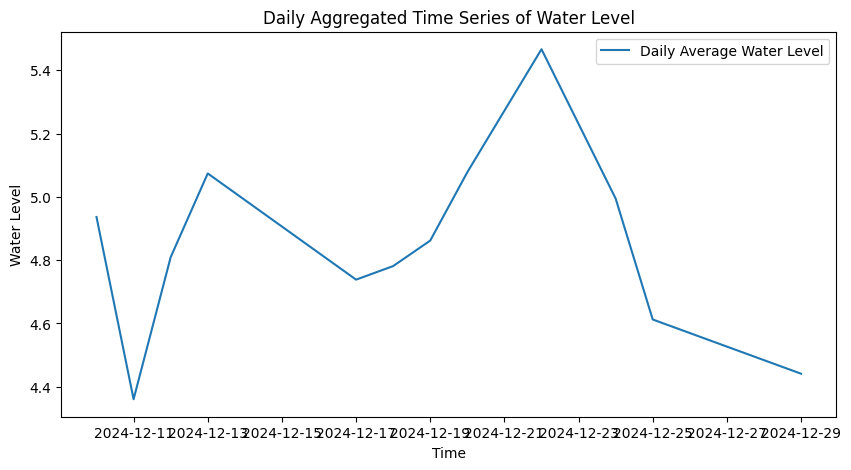

ADF Statistic: -1.540738599954521
p-value: 0.513270987120225


/Users/macbook/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/macbook/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/macbook/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/macbook/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer

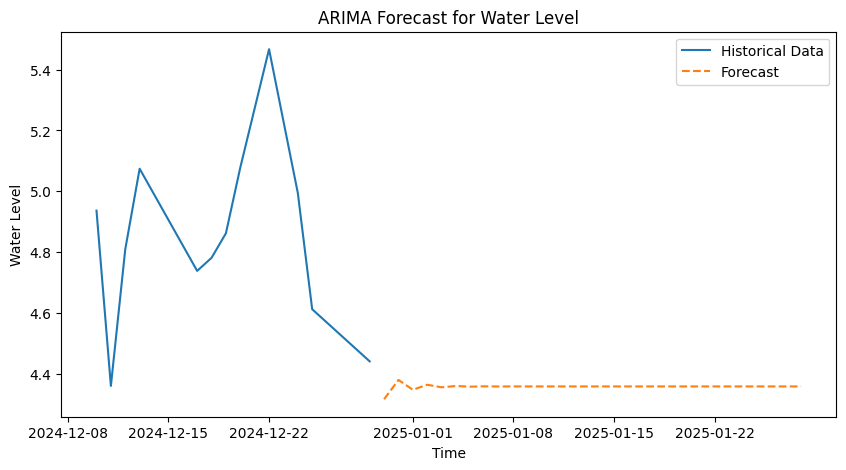

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Load dataset
data = pd.read_csv("collected_sensor_data.csv")
data.columns = data.columns.str.strip()
data['timestamp'] = pd.to_datetime(data['timestamp'], format="ISO8601")
data.set_index('timestamp', inplace=True)

# Choose the target variable
target_variable = 'water_level'

# Resample the data to daily frequency and calculate the mean of water level per day
daily_data = data[target_variable].resample('D').mean()

# Drop any rows with NaN values after resampling (optional, if any)
daily_data = daily_data.dropna()

# Visualize the daily aggregated time-series
plt.figure(figsize=(10, 5))
plt.plot(daily_data, label='Daily Average Water Level')
plt.title('Daily Aggregated Time Series of Water Level')
plt.xlabel('Time')
plt.ylabel('Water Level')
plt.legend()
plt.show()

# Perform the Augmented Dickey-Fuller test to check for stationarity
adf_result = adfuller(daily_data)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# If p-value < 0.05, the series is stationary. If not, you may need to difference the series.

# Fit ARIMA model (choose p, d, q values based on your analysis)
# For simplicity, we'll use an ARIMA(1,1,1) model here, but you should tune p, d, q.
model = ARIMA(daily_data, order=(1, 1, 1))
model_fit = model.fit()

# Forecast future values (next 30 days)
forecast_steps = 30  # Predict next 30 steps (e.g., days)
forecast = model_fit.forecast(steps=forecast_steps)

# Generate forecast index (next 30 days)
forecast_index = pd.date_range(daily_data.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Plot the historical data and forecast
plt.figure(figsize=(10, 5))
plt.plot(daily_data, label='Historical Data')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--')
plt.title('ARIMA Forecast for Water Level')
plt.xlabel('Time')
plt.ylabel('Water Level')
plt.legend()
plt.show()


In [52]:
import pandas as pd

# Load dataset
data = pd.read_csv("collected_sensor_data.csv")  # Replace with your actual file path
data.columns = data.columns.str.strip()

# Display column names
print(data.columns)


Index(['sensor_id', 'timestamp', 'location', 'barometric_pressure',
       'temperature', 'wind_direction', 'humidity', 'wind_speed',
       'precipitation', 'soil_moisture', 'evapotranspiration',
       'rainfall_duration', 'water_level', 'river_flow_rate', 'elevation',
       'solar_radiation', 'groundwater_level', 'air_quality_index'],
      dtype='object')


In [40]:
data.timestamp

0       2024-12-10 09:08:08 
1       2024-12-10 09:11:08 
2       2024-12-10 09:14:08 
3       2024-12-10 09:17:08 
4       2024-12-10 09:20:08 
                ...         
1604     2024-12-29 17:14:42
1605     2024-12-29 17:17:42
1606     2024-12-29 17:20:42
1607     2024-12-29 17:23:42
1608     2024-12-29 17:26:42
Name: timestamp, Length: 1609, dtype: object

In [31]:
import pandas as pd

# Assuming data['timestamp           '] is a pandas datetime column
data['timestamp           '] = pd.to_datetime(data['timestamp           '], format='mixed')  # Ensure it's in datetime format
data.columns = data.columns.str.strip()

# Filter rows where the date matches '2024-12-10'
filtered_data = data[data['timestamp'].dt.date == pd.to_datetime('2024-12-10').date()]

filtered_data.timestamp


0     2024-12-10 09:08:08
1     2024-12-10 09:11:08
2     2024-12-10 09:14:08
3     2024-12-10 09:17:08
4     2024-12-10 09:20:08
              ...        
148   2024-12-10 23:45:44
149   2024-12-10 23:48:44
150   2024-12-10 23:51:44
151   2024-12-10 23:54:44
152   2024-12-10 23:57:44
Name: timestamp, Length: 153, dtype: datetime64[ns]

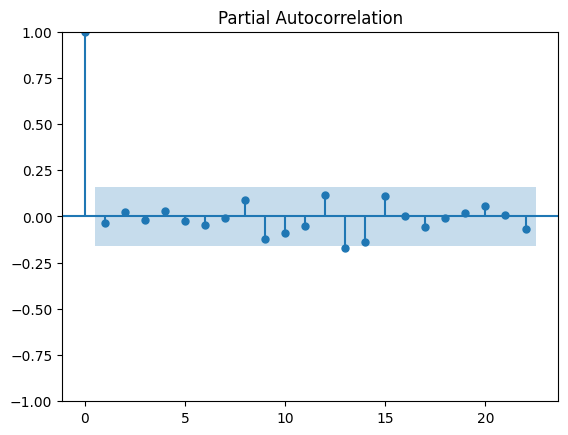

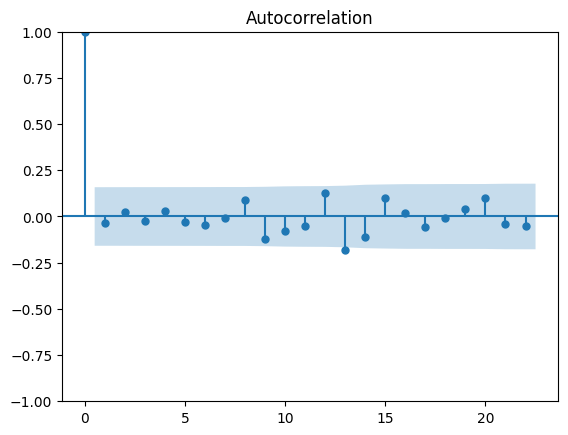

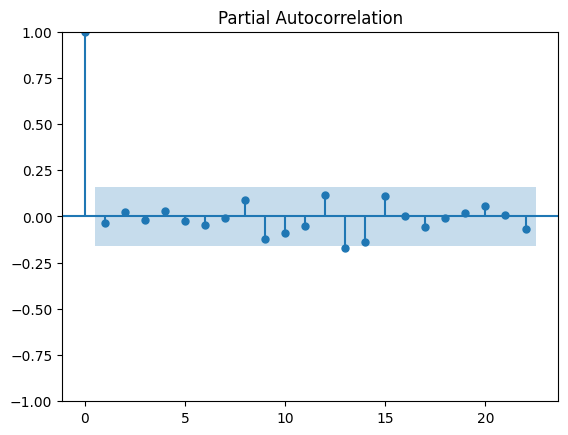

In [41]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(model_fit.resid)
sm.graphics.tsa.plot_pacf(model_fit.resid)


In [42]:
# Forecasting
forecast = model_fit.forecast(steps=10)  # Replace 10 with the desired number of steps
print("Forecasted Values:", forecast)


Forecasted Values: 153    4.185922
154    5.055651
155    4.909172
156    4.933842
157    4.929687
158    4.930387
159    4.930269
160    4.930289
161    4.930286
162    4.930286
Name: predicted_mean, dtype: float64


/Users/macbook/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/macbook/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(data['water_level'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()
print(sarima_fit.summary())


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72817D+00    |proj g|=  8.68740D-02


 This problem is unconstrained.



At iterate    5    f=  2.52261D+00    |proj g|=  3.40992D-02

At iterate   10    f=  2.49172D+00    |proj g|=  2.01908D-03

At iterate   15    f=  2.48944D+00    |proj g|=  3.14824D-03

At iterate   20    f=  2.48932D+00    |proj g|=  5.03228D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     32      1     0     0   9.222D-05   2.489D+00
  F =   2.4893230822564347     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                      
Dep. Variable:                        water_level   No. Observations:               

In [53]:
import pandas as pd

# Assuming your data is already loaded into a DataFrame
# Step 1: Convert the 'timestamp' column to datetime if it's not already
data.columns = data.columns.str.strip()
data['timestamp'] = pd.to_datetime(data['timestamp'], format='mixed')

# Step 2: Set the 'timestamp' column as the index
data.set_index('timestamp', inplace=True)

# Step 3: Select only numeric columns before resampling
numeric_data = data.select_dtypes(include=['number'])

# Step 4: Resample the numeric data to a desired frequency (e.g., 'H' for hourly, '30T' for every 30 minutes)
data_resampled = numeric_data.resample('H').mean()  # 'H' for hourly frequency

# Step 5: Handle missing values by forward filling or interpolating
data_resampled.fillna(method='ffill', inplace=True)  # Forward fill missing values
data_resampled

/var/folders/_s/gx8071b52xvc6pc57471s1cw0000gn/T/ipykernel_11581/2193165418.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_resampled = numeric_data.resample('H').mean()  # 'H' for hourly frequency
/var/folders/_s/gx8071b52xvc6pc57471s1cw0000gn/T/ipykernel_11581/2193165418.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_resampled.fillna(method='ffill', inplace=True)  # Forward fill missing values


,barometric_pressure,temperature,wind_direction,humidity,wind_speed,precipitation,soil_moisture,evapotranspiration,rainfall_duration,water_level,river_flow_rate,elevation,solar_radiation,groundwater_level,air_quality_index
timestamp,,,,,,,,,,,,,,,
2024-12-10 09:00:00,879.441111,-2.676111,192.849444,52.904444,26.603333,567.565556,32.637778,5.440000,12.275000,5.169444,125.228333,1367.138333,813.903889,8.565556,264.927222
2024-12-10 10:00:00,873.770000,7.285000,172.486500,49.562000,23.172500,516.114500,39.190500,4.816500,12.410500,5.164500,124.845500,1692.867000,676.216000,12.041000,256.477500
2024-12-10 11:00:00,852.780588,11.820588,183.936471,33.877059,21.053529,753.690588,47.868235,5.168824,12.053529,4.582941,149.088235,1584.481176,610.550000,13.685882,314.480588
2024-12-10 12:00:00,852.780588,11.820588,183.936471,33.877059,21.053529,753.690588,47.868235,5.168824,12.053529,4.582941,149.088235,1584.481176,610.550000,13.685882,314.480588
2024-12-10 13:00:00,852.780588,11.820588,183.936471,33.877059,21.053529,753.690588,47.868235,5.168824,12.053529,4.582941,149.088235,1584.481176,610.550000,13.685882,314.480588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-29 13:00:00,923.976000,35.572000,261.054000,51.778000,28.586000,625.482000,37.416000,5.150000,15.574000,4.162000,173.862000,1580.828000,1050.748000,8.386000,282.884000
2024-12-29 14:00:00,923.976000,35.572000,261.054000,51.778000,28.586000,625.482000,37.416000,5.150000,15.574000,4.162000,173.862000,1580.828000,1050.748000,8.386000,282.884000
2024-12-29 15:00:00,923.976000,35.572000,261.054000,51.778000,28.586000,625.482000,37.416000,5.150000,15.574000,4.162000,173.862000,1580.828000,1050.748000,8.386000,282.884000
